In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines = datasets.load_wine()

In [4]:
# Separamos nuestra dataset
X_wines = wines.data
Y_wines = wines.target

In [9]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

In [5]:
# Llevo los datos a una estructura de DataFrame
X = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
y = pd.DataFrame(Y_wines, columns = ['Target'])
X.head(5)

Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  Total Phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid Phenols  Proanthocyanins  Colour Intensity   Hue  \
0        3.06                  0.28             2.29              5.64  1.04   
1        2.76                  0.26             1.28              4.38  1.05   
2        3.24                  0.30             2.81              5.68  1.03   
3        3.49                  0.24             2.18              7.80  0.86   
4        2.69                  0.39             1.82              4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Text(0, 0.5, 'Proline')

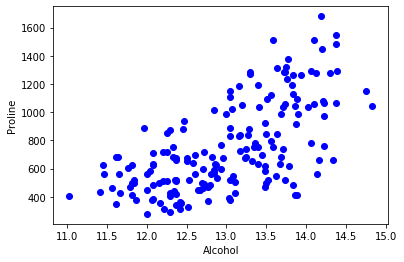

In [34]:
plt.scatter(X['Alcohol'], X['Proline'], c = 'blue')
plt.xlabel('Alcohol', fontsize = 10)
plt.ylabel('Proline', fontsize = 10)

In [35]:
model = KMeans(n_clusters = 3, max_iter = 1000)   #n_clusters es el valor de k nos permite generar los centroides
# Cuando el accuracy sale muy bajo modificamos el num de centroides en cluster 
model.fit(X)   #Son nuestros puntos
y_labels = model.labels_     #Se mandan llamar a las etiquetas que encontro en base a la similitud

In [36]:
y_kmeans = model.predict(X)    #como tienes la info 
print('Predicciones ', y_kmeans)   #Imprime los dos grupos de puntos    

Predicciones  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [37]:
accuracy = metrics.adjusted_rand_score(Y_wines, y_kmeans)
print(accuracy)

0.37111371823084754


Text(0, 0.5, 'Proline')

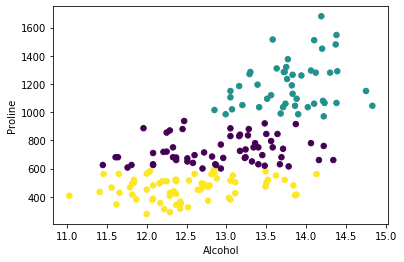

In [40]:
plt.scatter(X['Alcohol'], X['Proline'], c= y_kmeans, s = 30)
plt.xlabel('Alcohol', fontsize = 10)
plt.ylabel('Proline', fontsize = 10)

numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.3694075388574537
numero de n_clusters: 3 accurracy 0.37111371823084754
numero de n_clusters: 4 accurracy 0.30344253157834694
numero de n_clusters: 5 accurracy 0.31158801033176253
numero de n_clusters: 6 accurracy 0.29090227688418224
numero de n_clusters: 7 accurracy 0.22632105878612552
numero de n_clusters: 8 accurracy 0.19933615927955298
numero de n_clusters: 9 accurracy 0.18197901068434116
numero de n_clusters: 10 accurracy 0.15432452307609384


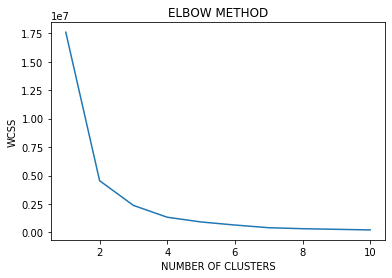

In [22]:
wcss = []      #Buscampos el centroide mas cercano a 100 para el cluster que sería 3, con la grafica del codo 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    wcss.append(kmeans.inertia_)
    accuracy =  metrics.adjusted_rand_score(Y_wines, y_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
#Graficar 
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

predicciones  [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
0.37111371823084754


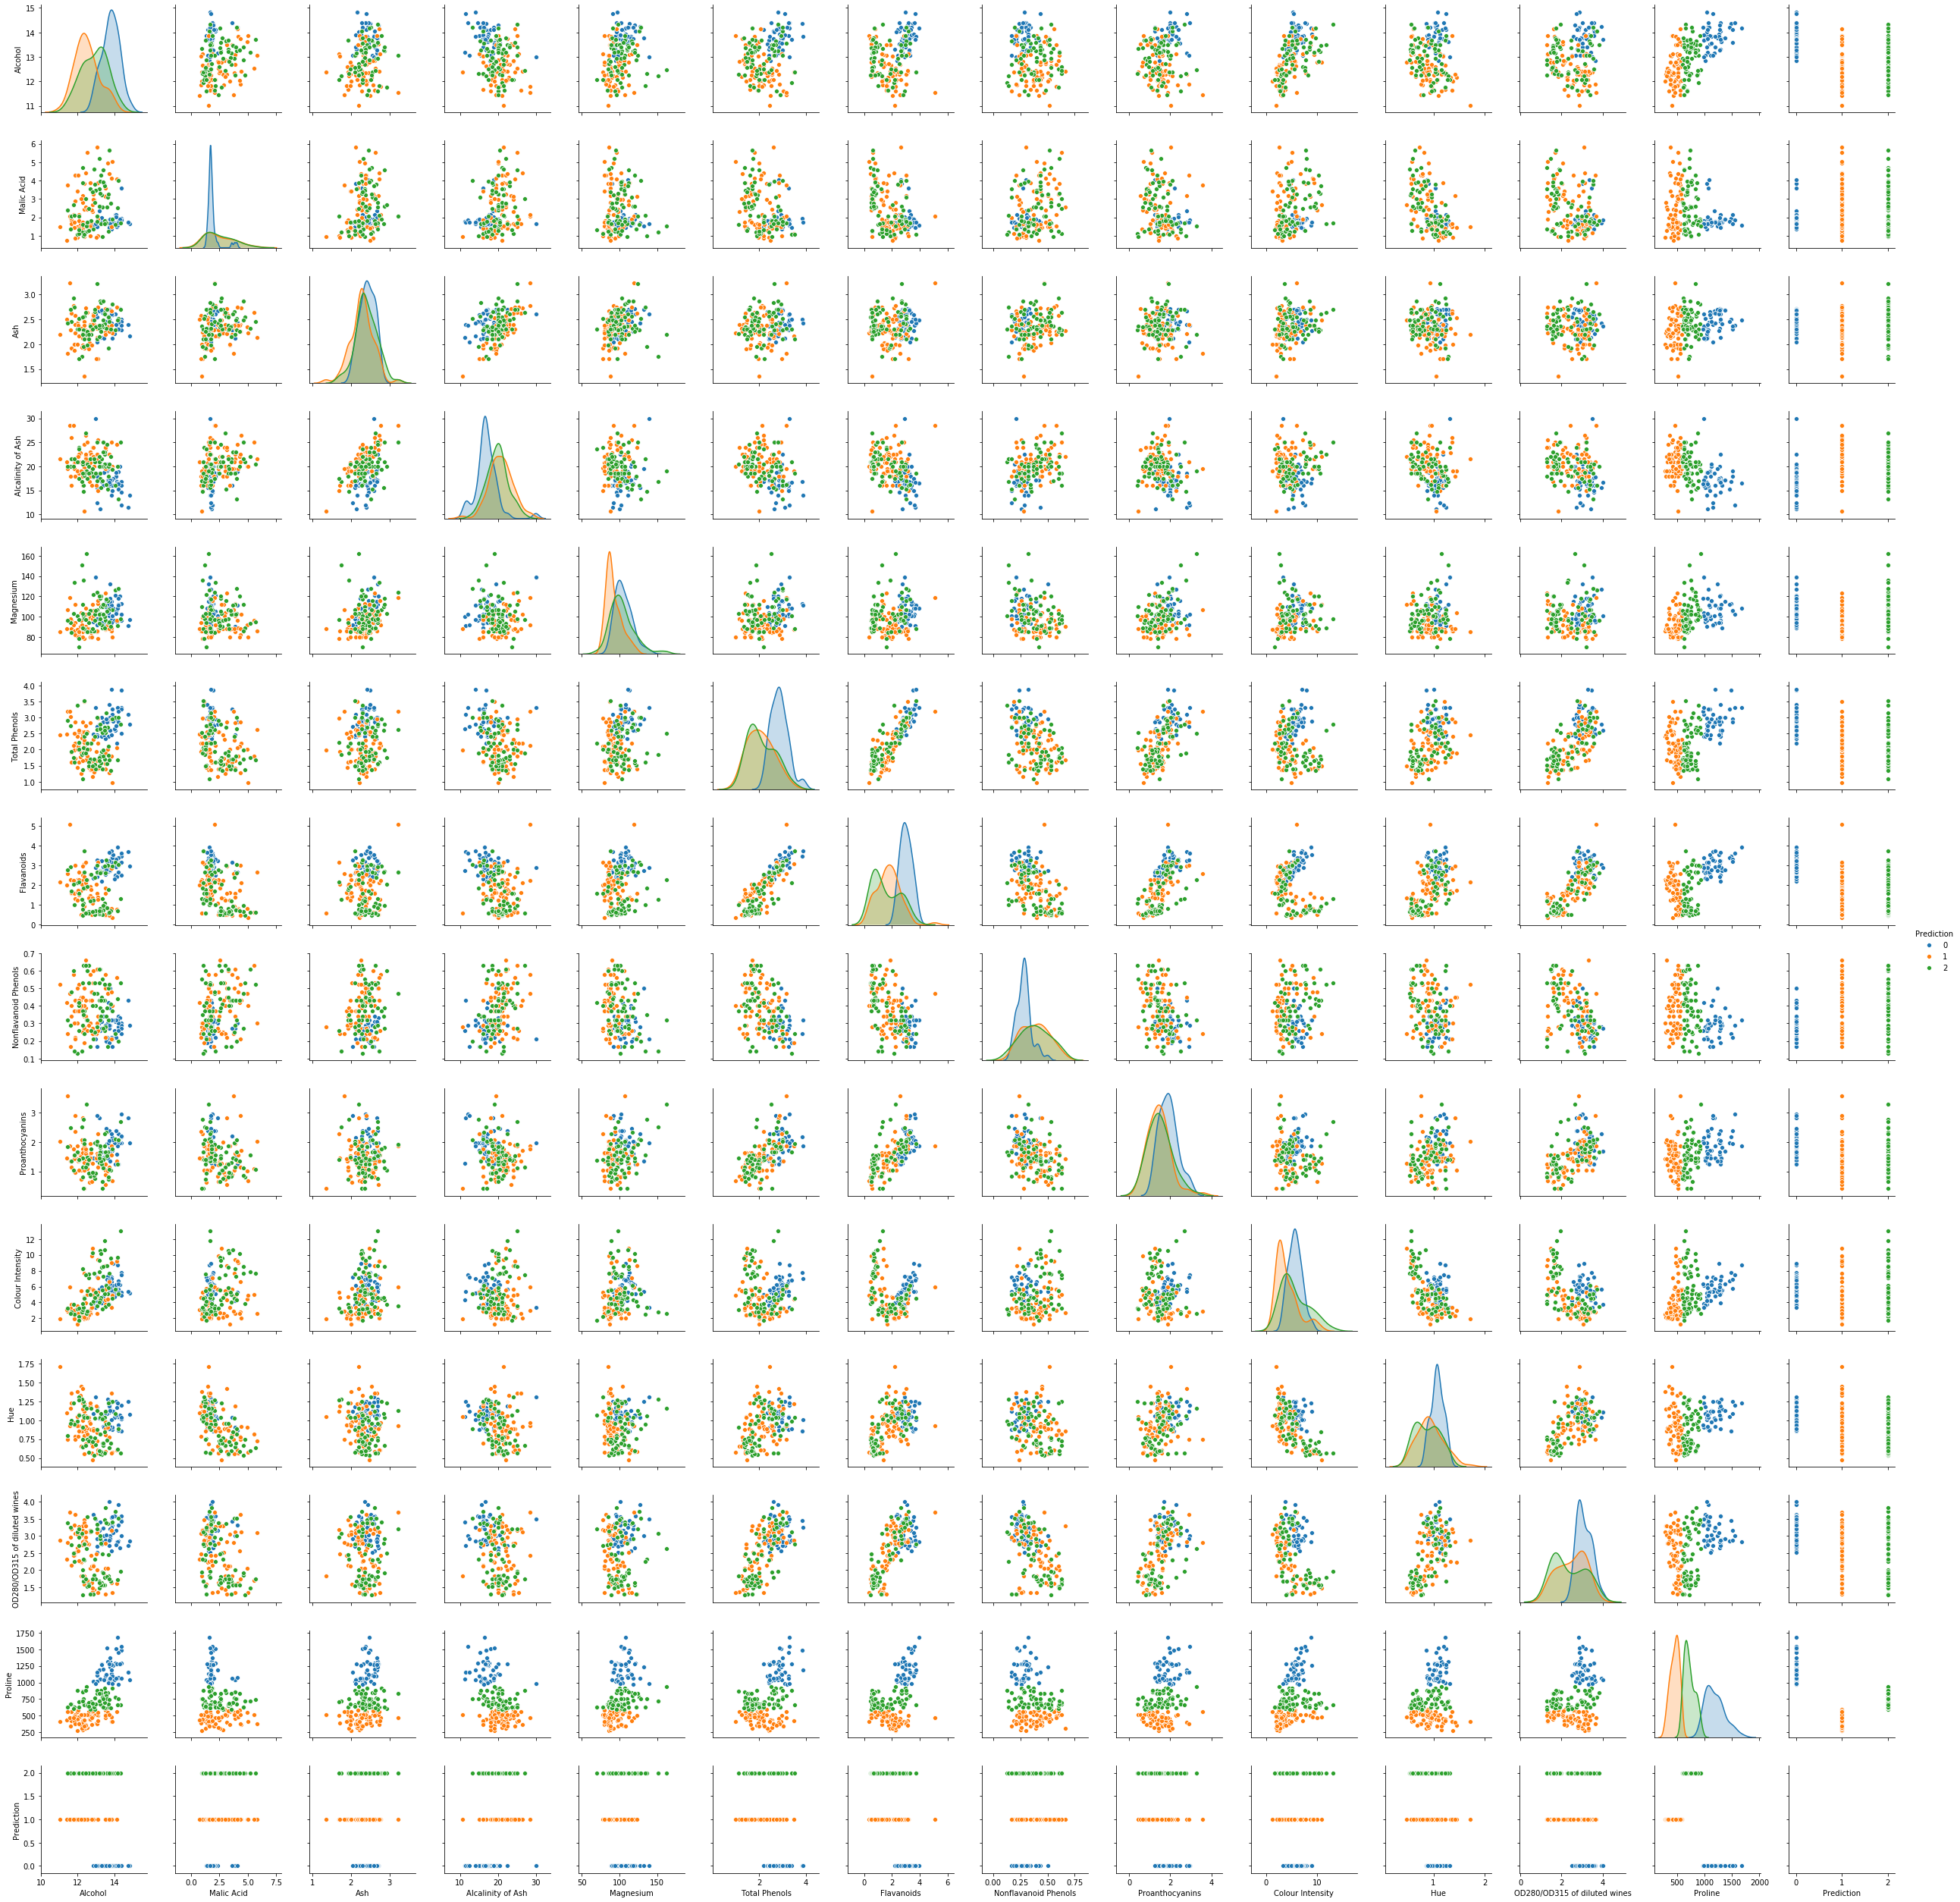

In [30]:
# Aplico el modelo de KMeans
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(X)
y_labels = model.labels_
y_kmeans = model.predict(X)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])      #Se convierte la prediccion en dataframe para poder concatenarlo

# Precisión del modelo
accuracy =  metrics.adjusted_rand_score(Y_wines, y_kmeans)
print(accuracy)

# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([X, y_kmeans_df],axis=1)

# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')